# Venues Data Analysis of Moscow City 

# Stage II - Data analysis

# Capstone Project - The Battle of the Neighborhoods

## Applied Data Science Capstone by IBM/Coursera

# Methodology 

#### Import requied libraries

In [1]:
# Import requied libraries
import pandas as pd # library for data analsysis
import folium
from folium.plugins import HeatMap
import numpy as np # library to handle data in a vectorized manner
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from scipy import stats

### Load previously prepeareds 

In [6]:
Moscow_Borough_df = pd.read_csv("data\Moscow_Borough_df.csv")
Moscow_venues_df = pd.read_csv("data\Moscow_venues_df.csv")
mo_geojson = 'data\mo.geojson'

## Exploratory Data Analysis

The key criteria for my research are:

- high population of the borough
- low cost of real estate in the area

We have theese key features in Moscow Boroughs dataset:

- District - name of the Moscow District in which Borough is belong to
- Area - area of the Moscow Borough in square kilometers
- Population_Density - population density of the Moscow Borough
- Housing_Area - housing area of the Moscow Borough in square meters

Let's analyze features and key criteria using:

- descriptive statistical analysis
- categorical variables  analysis
- сorrelation analysis

### Descriptive statistical analysis

Сreate subset of the feature

In [43]:
# list of the potential features
Moscow_Borough_Feature_list = ['Borough_Name', 'District_Name', 'Borough_Area', 'Borough_Population_Density', 'Borough_Housing_Area', 'Borough_Population', 'Borough_Housing_Price']

# create subset of the potential features
Moscow_Borough_Feature_df = Moscow_Borough_df[Moscow_Borough_Feature_list]

# rename columns for easier understanding
Moscow_Borough_Feature_df.columns = ['Borough', 'District', 'Area', 'Population_Density', 'Housing_Area', 'Population', 'Housing_Price']

# Take a look at the correlation matrix 
print('Take a look at the features dataframe')
Moscow_Borough_Feature_df.head(10)

Take a look at the features dataframe


Borough District  Area  Population_Density  Housing_Area  \
0    Академический     ЮЗАО  5.83               18762        2467.0   
1     Алексеевский     СВАО  5.29               15223        1607.9   
2     Алтуфьевский     СВАО  3.25               17721         839.3   
3            Арбат      ЦАО  2.11               17120         731.0   
4         Аэропорт      САО  4.58               17355        1939.7   
5     Бабушкинский     СВАО  5.07               17462        1586.3   
6        Басманный      ЦАО  8.37               13225        1991.8   
7          Беговой      САО  5.56                7694         791.1   
8  Бескудниковский      САО  3.30               24122        1391.7   
9         Бибирево     СВАО  6.45               24831        2521.8   

   Population  Housing_Price  
0      109387       199999.0  
1       80534       199474.0  
2       57596       138021.0  
3       36125       438568.0  
4       79486       234544.0  
5       88537       164324.0  
6      110694       302021.0  
7       42781       261402.0  
8       79603       158398.0  
9      160163       140533.0

Compute basic statistics for all features

In [44]:
# the count of that variable
# the mean
# the standard deviation (std)
# the minimum value
# the IQR (Interquartile Range: 25%, 50% and 75%)
# the maximum value

print('Take a look at the basic statistics')
Moscow_Borough_Feature_df.describe()

Take a look at the basic statistics


Area  Population_Density  Housing_Area     Population  \
count  120.000000          120.000000    120.000000     120.000000   
mean     8.706417        13426.608333   1775.684167   99847.608333   
std      4.927028         5956.551611    815.978445   44024.992123   
min      2.110000          559.000000     69.900000   12194.000000   
25%      5.395000         9745.750000   1244.450000   71821.750000   
50%      7.680000        13266.000000   1709.450000   93892.000000   
75%     10.282500        17151.000000   2206.600000  126545.750000   
max     27.570000        30428.000000   4523.000000  253943.000000   

       Housing_Price  
count     120.000000  
mean   190037.316667  
std     66182.885601  
min    109421.000000  
25%    147339.000000  
50%    168172.500000  
75%    210978.000000  
max    438568.000000

As we can see, Moscow Boroughs has a very uneven population from 12 194 people to 253 943 people.  
The average cost of real estate varies from 109 421 rubles/m²  to 438 568 rubles/m².

### Categorical variables  analysis

I have one categorical variable - name of the Moscow District in which Borough is belong to.  
Let's analize relationship between categorical feature 'District' and key criteria using boxplots visualization.

Let's look at the relationship between 'District' and 'Population'


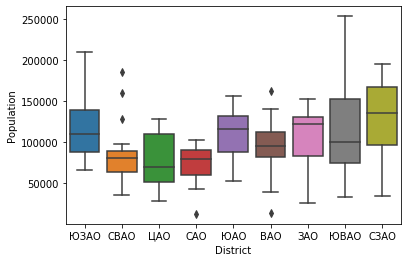

In [35]:
print ("Let's look at the relationship between 'District' and 'Population'")
sns.boxplot(x="District", y="Population", data=Moscow_Borough_Feature_df)

We can see that the distributions of Population between Boroughs in the different Districts have aт overlap, but we can estimate, that the most populated Boroughs are placed in 'ЮЗАО', 'ЮАО', 'СЗАО' and 'ЗАО' Districts.  


Let's look at the relationship between 'District' and 'Housing_Price'


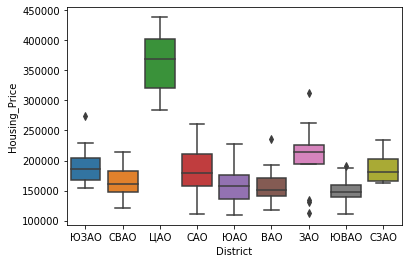

In [38]:
print ("Let's look at the relationship between 'District' and 'Housing Price'")
sns.boxplot(x="District", y="Housing_Price", data=Moscow_Borough_Feature_df)

We see that the distributions of Housing Price between Boroughs in the different Districts are distinct enough.

As the result of boxplots visualization, categorical feature 'District' would be a good potential redictor only of Housing Price.

### Correlation analysis

**Calculate and visualize correlation matrix**

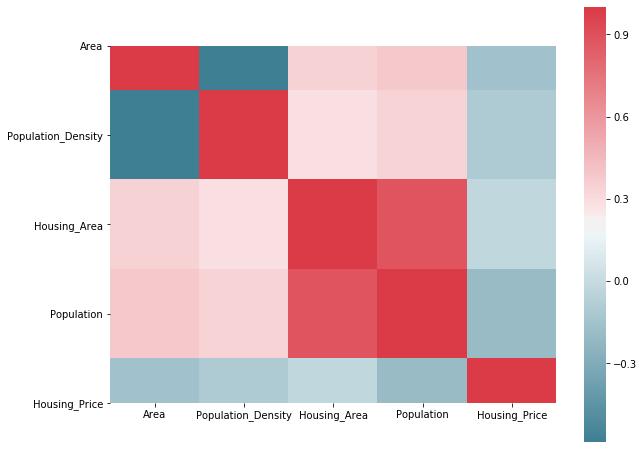

In [46]:
# calculate correlation matrix 
Moscow_Borough_Feature_corr = Moscow_Borough_Feature_df.corr()

# visualize correlation matrix 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(Moscow_Borough_Feature_corr, mask=np.zeros_like(Moscow_Borough_Feature_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [47]:
print('Take a look at the correlation matrix ')
Moscow_Borough_Feature_corr.head(6)

Take a look at the correlation matrix 


Area  Population_Density  Housing_Area  Population  \
Area                1.000000           -0.585991      0.344188    0.380587   
Population_Density -0.585991            1.000000      0.289456    0.338621   
Housing_Area        0.344188            0.289456      1.000000    0.887856   
Population          0.380587            0.338621      0.887856    1.000000   
Housing_Price      -0.154996           -0.101348     -0.016971   -0.195774   

                    Housing_Price  
Area                    -0.154996  
Population_Density      -0.101348  
Housing_Area            -0.016971  
Population              -0.195774  
Housing_Price            1.000000

Let's estimate the significant of the correlations with P-value. By convention, when the:

- p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
- the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
- the p-value is  <  0.1: there is weak evidence that the correlation is significant.
- the p-value is  >  0.1: there is no evidence that the correlation is significant.

**Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Population'**

In [56]:
# Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Population'
pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Area' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Population_Density'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Population_Density' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient 'Area' to 'Population' is 0.3805873263508918  with a P-value of P = 1.8028898720764835e-05
The Pearson Correlation Coefficient 'Population_Density' to 'Population' is 0.33862089326311196  with a P-value of P = 0.00015496849213042396
The Pearson Correlation Coefficient 'Housing_Area' to 'Population' is 0.8878557225818343  with a P-value of P = 1.36388885363977e-41


Correlation between 'Area', 'Population_Density' and 'Population' is statistically significant, although the linear relationship isn't extremely strong.  
Correlation between 'Housing_Are' and 'Population' is statistically hughly significant, and the linear relationship is extremely strong. 

**Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Housing_Price'**

In [57]:
#Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Housing_Price'
pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Area' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Population_Density'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Population_Density' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient 'Area' to 'Housing_Price' is -0.15499599520906004  with a P-value of P = 0.09095993625676131
The Pearson Correlation Coefficient 'Population_Density' to 'Housing_Price' is -0.101347654460966  with a P-value of P = 0.2707112154681113
The Pearson Correlation Coefficient 'Housing_Area' to 'Housing_Price' is -0.0169708163901411  with a P-value of P = 0.854034357178659


Correlation between 'Area', 'Population_Density', 'Housing_Area' and 'Housing_Price' is not statistically significant, although the linear relationship isn't strong. 

**Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area'**

In [58]:
#Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area'
pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Population_Density'])
print("The Pearson Correlation Coefficient 'Area' to 'Population_Density' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Population_Density'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Population_Density' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Area'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Area' is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient 'Area' to 'Population_Density' is -0.5859910838643374  with a P-value of P = 2.0503829299220935e-12
The Pearson Correlation Coefficient 'Housing_Area' to 'Population_Density' is 0.2894561614147714  with a P-value of P = 0.0013432392930785705
The Pearson Correlation Coefficient 'Housing_Area' to 'Area' is 0.3441883147278516  with a P-value of P = 0.00011849306555458508


Correlation between 'Area' to 'Population_Density' is statistically hughly significant, and the linear relationship is extremely strong.  
So we can exclude 'Population_Density' from our considerations.

## K-Means Clustering

In my research, I will try to determine the optimal places for the location of fitness centers in Moscow boroughs, taking into account the number of people, the cost of real estate and the density of other fitness facilities.

So try to perform Moscow Boroughs segmentation with K-Means using elbow method to detect Boroughs that have highest mean population and smallest mean housing price.

Define the function clustering using k-means with elbow visualizations

In [59]:
def KMeans_elbow(X, max_clusters=10):
   
    #==============================================================================
    # Building the clustering model and calculating the values of the Distortion and Inertia
    #==============================================================================
    distortions = [] 
    inertias = [] 
    mapping1 = {} 
    mapping2 = {} 
    K = range(1,max_clusters) 
    
     
    for k in K: 
        #Building and fitting the model 
        kmeans = KMeans(init = "k-means++", n_clusters=k, random_state=0, n_init = 12)
        kmeans.fit(X) 
          
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
        inertias.append(kmeans.inertia_) 
      
        mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0] 
        mapping2[k] = kmeans.inertia_ 
    
    
    #==============================================================================
    # Visualizing the results using the different values of Distortion
    #==============================================================================
    print('Visualizing the results using the different values of Distortion')
    for key,val in mapping1.items(): 
        print(str(key)+' : '+str(val))
    
    plt.plot(K, distortions, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Distortion') 
    plt.title('The Elbow Method using Distortion') 
    plt.show() 
    
    #==============================================================================
    # Visualizing the results using the different values of Inertia
    #==============================================================================
    print('Visualizing the results using the different values of Inertia')
    for key,val in mapping2.items(): 
        print(str(key)+' : '+str(val)) 
        
    plt.plot(K, inertias, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method using Inertia') 
    plt.show() 

### Calculate number of clusters using elbow method

Visualizing the results using the different values of Distortion
1 : 1.1679534787476373
2 : 0.9770333890796944
3 : 0.7525815553527937
4 : 0.6626384906157
5 : 0.5703195086129899
6 : 0.5167376260486283
7 : 0.4796696408008285
8 : 0.43655207006822294
9 : 0.4104115692994678


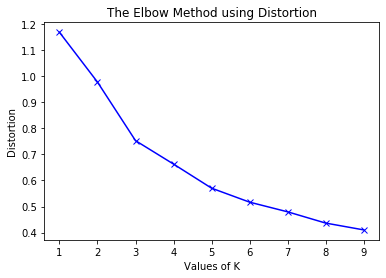

Visualizing the results using the different values of Inertia
1 : 240.0
2 : 154.8554826213927
3 : 87.31369540936936
4 : 68.41935600971378
5 : 51.10284420902047
6 : 42.7197017981842
7 : 34.339979846118666
8 : 29.153580001418643
9 : 25.959930345667352


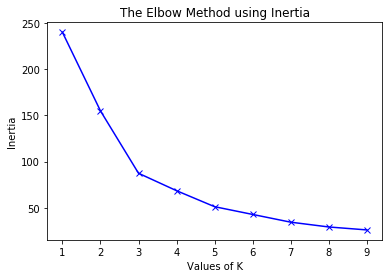

In [60]:
# prepare dataset for K-means clustering
X2 = Moscow_Borough_df[['Borough_Population','Borough_Housing_Price']]

# Normalizing over the standard deviation
X2 = StandardScaler().fit_transform(X2)

# itterate from 1 to 10 n_clusters, calculate distortion and inertia, visualize it
KMeans_elbow(X2, 10)

We can see that there are elbows at 3 centroid. Let's analyze it.

### Analyze K-Means clusters

In [61]:
# Analyze 3 centroid KMeans clustering
kclusters = 3

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=0, n_init = 12)
kmeans.fit(X2)

# Add clustering labels
Moscow_Borough_df['Cluster_Labels'] = kmeans.labels_.astype(int)

# Analyze Clustres 
groups = Moscow_Borough_df.groupby('Cluster_Labels')
Moscow_population = Moscow_Borough_df['Borough_Population'].sum()
Moscow_area = Moscow_Borough_df['Borough_Area'].sum()
Moscow_Clustering_df = groups.mean().reset_index()[['Cluster_Labels', 'Borough_Population', 'Borough_Housing_Price']]
Moscow_Clustering_df.columns = ['Cluster_Labels', 'Population_Mean', 'Housing_Price_Mean']
Moscow_Clustering_df['Population_Sum'] = groups.sum().reset_index()[['Borough_Population']]
Moscow_Clustering_df['Population_%'] = Moscow_Clustering_df['Population_Sum'] / Moscow_population * 100
Moscow_Clustering_df['Borough_Count'] = groups.count().reset_index()[['Borough_Name']]
Moscow_Clustering_df['Area_Sum'] = groups.sum().reset_index()[['Borough_Area']]
Moscow_Clustering_df['Area_%'] = Moscow_Clustering_df['Area_Sum'] / Moscow_area * 100
Moscow_Clustering_df['Population_Density'] = Moscow_Clustering_df['Population_Sum'] / Moscow_Clustering_df['Area_Sum']

# Print clusters 
Moscow_Clustering_df.head()

# Save dataframe
Moscow_Clustering_df.to_csv("data\Moscow_Clustering_df.csv", index = False)
Moscow_Borough_df.to_csv("data\Moscow_Borough_df.csv", index = False)

Cluster_Labels  Population_Mean  Housing_Price_Mean  Population_Sum  \
0               0     78538.901408       173695.070423         5576262   
1               1    153187.235294       160741.323529         5208366   
2               2     79805.666667       333794.866667         1197085   

   Population_%  Borough_Count  Area_Sum     Area_%  Population_Density  
0     46.539773             71    539.87  51.673574        10328.897698  
1     43.469294             34    391.25  37.448434        13312.117572  
2      9.990934             15    113.65  10.877992        10533.084030

As we can see, there are 3 clusters, 
- "0" Cluster - characterized by low mean population (78538 people per Borough), relatively high mean housing price (173695 rubles/m²) and low population density (10328 people/km²)
- "1" Cluster - characterized by highest mean population (153187 people per Borough), smallest mean housing price (160741 rubles/m²) and highest population density (13312 people/km²)
- "2" Cluster - characterized by low mean population (79805 people per Borough), highest mean housing price (333794 rubles/m²) and low population density (10533 people/km²)

Very good result of the KMean clustering.   
"1" Cluster perfectly fits my research criteria. 
- boroughs from this cluster have highest mean population and smallest mean housing price
- in 34 boroughs about 43% of the Moscow population occupied only 37% of the Moscow City area, that mean the highest population density

**Vizualize clusters using boxplots visualization**

Let's look at the relationship between 'Cluster_Labels' and 'Borough_Housing_Price'


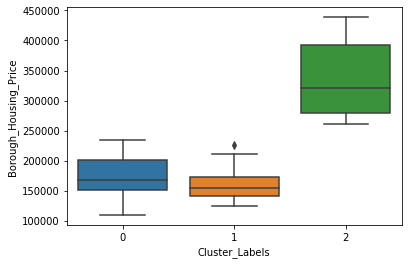

In [63]:
print ("Let's look at the relationship between 'Cluster_Labels' and 'Borough_Housing_Price'")
sns.boxplot(x="Cluster_Labels", y="Borough_Housing_Price", data=Moscow_Borough_df)

Let's look at the relationship between 'Cluster_Labels' and 'Borough_Population'


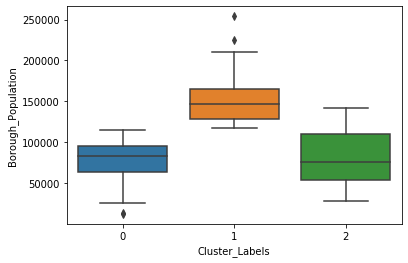

In [64]:
print ("Let's look at the relationship between 'Cluster_Labels' and 'Borough_Population'")
sns.boxplot(x="Cluster_Labels", y="Borough_Population", data=Moscow_Borough_df)

**Vizualize clusters using choropleth map**

In [2]:
Moscow_Borough_df = pd.read_csv("data\Moscow_Borough_df.csv")
mo_geojson = 'data\mo.geojson'

# Moscow latitude and longitude values
Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

# create map 
Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)

# generate choropleth map
Moscow_map.choropleth(
    geo_data=mo_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Cluster_Labels'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Borough Gym Clustering in Moscow City')


# Add Borougs center as markers to Moscow map 
for Borough_Name, lat, lng, Borough_Population in zip(Moscow_Borough_df['Borough_Name'], Moscow_Borough_df['Latitude'], Moscow_Borough_df['Longitude'], Moscow_Borough_df['Borough_Population']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        #popup='{}, Москва, Россия ({:})'.format(Borough_Name, Borough_Population),
        popup=folium.Popup('{}, Москва, Россия ({:})'.format(Borough_Name, Borough_Population), parse_html=True),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Moscow_map)

Moscow_map

# Result

## Dataset of the optimal Boroughs

In [23]:
# List of optimal Boroughs for the location of fitness centers
Moscow_Recomended_Borough_df = Moscow_Borough_df[Moscow_Borough_df['Cluster_Labels'].isin(['1'])]

# Drop some colums 
Moscow_Recomended_Borough_df.drop(['Latitude','Longitude','Cluster_Labels', 'OKTMO_District_Code', 'OKATO_Borough_Code', 'Borough_Housing_Area_Per_Person'], axis=1, inplace=True)

# reset index
Moscow_Recomended_Borough_df.reset_index(drop=True, inplace=True)

# save the result dataset
Moscow_Recomended_Borough_df.to_csv("data\Moscow_Recomended_Borough_df.csv", index = False)

# Take a look at the dataframe
Moscow_Recomended_Borough_df.head(40)

Borough_Name District_Name         Borough_Type  \
0                    Бибирево          СВАО  Муниципальный округ   
1          Бирюлёво Восточное           ЮАО  Муниципальный округ   
2                     Вешняки           ВАО  Муниципальный округ   
3             Выхино-Жулебино          ЮВАО  Муниципальный округ   
4                   Гольяново           ВАО  Муниципальный округ   
5                      Зюзино          ЮЗАО  Муниципальный округ   
6                   Зябликово           ЮАО  Муниципальный округ   
7                  Ивановское           ВАО  Муниципальный округ   
8                    Коньково          ЮЗАО  Муниципальный округ   
9                   Кузьминки          ЮВАО  Муниципальный округ   
10                    Кунцево           ЗАО  Муниципальный округ   
11                    Люблино          ЮВАО  Муниципальный округ   
12                    Марьино          ЮВАО  Муниципальный округ   
13                     Митино          СЗАО  Муниципальный округ   
14                  Можайский           ЗАО  Муниципальный округ   
15          Нагатинский Затон           ЮАО  Муниципальный округ   
16           Ново-Переделкино           ЗАО  Муниципальный округ   
17  Орехово-Борисово Северное           ЮАО  Муниципальный округ   
18     Орехово-Борисово Южное           ЮАО  Муниципальный округ   
19                   Отрадное          СВАО  Муниципальный округ   
20        Очаково-Матвеевское           ЗАО  Муниципальный округ   
21                     Перово           ВАО  Муниципальный округ   
22        Северное Медведково          СВАО  Муниципальный округ   
23            Северное Тушино          СЗАО  Муниципальный округ   
24                   Солнцево           ЗАО  Муниципальный округ   
25                   Строгино          СЗАО  Муниципальный округ   
26                Тёплый Стан          ЮЗАО  Муниципальный округ   
27         Тропарёво-Никулино           ЗАО  Муниципальный округ   
28          Хорошёво-Мнёвники          СЗАО  Муниципальный округ   
29                   Царицыно           ЮАО  Муниципальный округ   
30      Чертаново Центральное           ЮАО  Муниципальный округ   
31            Чертаново Южное           ЮАО  Муниципальный округ   
32               Южное Бутово          ЮЗАО  Муниципальный округ   
33                    Ясенево          ЮЗАО  Муниципальный округ   

    Borough_Area  Borough_Population  Borough_Population_Density  \
0           6.45              160163                       24831   
1          14.77              155863                       10552   
2          10.72              122285                       11407   
3          14.97              225154                       15040   
4          14.99              163009                       10874   
5           5.45              126815                       23268   
6           4.38              133278                       30428   
7          10.19              128267                       12587   
8           7.18              156389                       21781   
9           8.15              145984                       17912   
10         16.56              152364                        9200   
11         17.41              172054                        9882   
12         11.91              253943                       21321   
13         12.67              194965                       15387   
14         10.73              138610                       12917   
15          9.80              120954                       12342   
16          8.48              121553                       14334   
17          7.67              132265                       17244   
18          6.94              147789                       21295   
19         10.18              185488                       18220   
20         17.54              130742                        7453   
21          9.73              140968                       14487   
22          5.66              127819                       22582   
23  

## Dataset of the competitive fitness facilities

In [24]:
# load previously saved dataset
Moscow_venues_df = pd.read_csv("data\Moscow_venues_df.csv")

# list of the recomended  Boughs from cluster 1
Moscow_Recomended_Borough_list = Moscow_Borough_df[Moscow_Borough_df['Cluster_Labels'].isin(['1'])]['Borough_Name']

# list of all subcategories Gym / Fitness Center
gym_categories = ['Gym / Fitness Center','Boxing Gym','Climbing Gym','Cycle Studio','Gymnastics Gym','Gym','Martial Arts Dojo','Outdoor Gym','Pilates Studio','Weight Loss Center','Yoga Studio']

# Make venues subset of all subcategories of "Gym / Fitness Center"
Moscow_gym_venues_df = Moscow_venues_df[Moscow_venues_df['Venue_Category_Name'].isin(gym_categories)]
print('There are {} venues of "Gym / Fitness Center" subcategories of all {} venues in Moscow City'.format(Moscow_gym_venues_df.shape[0], Moscow_venues_df.shape[0]))

# Delete Venues that placed outside our cluster 1
Moscow_gym_venues_df = Moscow_gym_venues_df[Moscow_gym_venues_df['Borough_Name'].isin(Moscow_Recomended_Borough_list)]
print('There are {} venues of all "Gym / Fitness Center" subcategories in 1 Cluster'.format(Moscow_gym_venues_df.shape[0]))

There are 928 venues of "Gym / Fitness Center" subcategories of all 20864 venues in Moscow City
There are 259 venues of all "Gym / Fitness Center" subcategories in 1 Cluster


In [25]:
# prepare the result dataset with fitness center 
Moscow_gym_venues_df = Moscow_gym_venues_df[['Borough_Name','Venue_Name','Venue_Category_Name','Venue_Location','Venue_Latitude','Venue_Longitude']]

# reset index
Moscow_gym_venues_df.reset_index(drop=True, inplace=True)

# save the result dataset
Moscow_gym_venues_df.to_csv("data\Moscow_gym_venues_df.csv", index = False)

# Take a look at the dataframe
Moscow_gym_venues_df.head(30)

Borough_Name                                     Venue_Name  \
0            Южное Бутово                                    Фитнес Гуру   
1            Южное Бутово                                  Yoga Practika   
2            Южное Бутово                                     Тонус Клуб   
3            Южное Бутово                                        ЖелезКа   
4            Южное Бутово                                          Зебра   
5            Южное Бутово                                          Ангел   
6            Южное Бутово                                    Фитнес Гуру   
7            Южное Бутово                                        Спорт К   
8            Южное Бутово                       Фитнес-клуб Зебра ЭТАЛОН   
9                 Ясенево                          Фитнес-центр «Мореон»   
10       Ново-Переделкино                                    Family Club   
11                Ясенево  Физкультурно-оздоровительный комплекс Ясенево   
12                Ясенево                Центр йоги и здоровья в Ясенево   
13                Ясенево                               ГУП "Час Спорта"   
14                Ясенево                            Спортивная площадка   
15        Чертаново Южное             Центр Физической Культуры И Спорта   
16        Чертаново Южное                               ФОК ул. Дорожная   
17       Ново-Переделкино                                 Олимпик Фитнес   
18     Бирюлёво Восточное                                   Alex Fitness   
19                Ясенево                                      Спортлэнд   
20                Ясенево                                 Encore Fitness   
21                Ясенево            Тренажерный зал "Обыкновенное Чудо"   
22        Чертаново Южное                                   HARDCORE GYM   
23     Бирюлёво Восточное                    Школа дзюдо "Юность Москвы"   
24     Бирюлёво Восточное                        СДЮСШОР №47 ФОК «Южный»   
25       Ново-Переделкино                              Magneto Sport&SPA   
26                Ясенево                               МУ ЦСиД "Атлант"   
27  Чертаново Центральное                       ФОК "Красный Маяк" МГФСО   
28        Чертаново Южное                                    Fitsolution   
29        Чертаново Южное                                     Paris Life   

     Venue_Category_Name                                 Venue_Location  \
0   Gym / Fitness Center                       Ул. Адмирала Руднева д.4   
1            Yoga Studio                        Южнобутовская ул., д.36   
2                    Gym                              Южнобутовская, 36   
3                    Gym                                           Ноао   
4   Gym / Fitness Center     ТЦ «Витте Молл» (Венёвская ул., 6), 117042   
5                    Gym                       Скобелевская улица дом 2   
6                    Gym                                  Изюмская 22-3   
7                    Gym                                         Россия   
8   Gym / Fitness Center                           Ул. Поляны 5, 117042   
9   Gym / Fitness Center  Аквапарк МОРЕОН (Голубинская ул., 16), 117574   
10  Gym / Fitness Center            ул. Шолохова, 5 (ул. Новоорловская)   
11                   Gym               Вильнюсская ул., 6, к. 2, 117574   
12           Yoga Studio                               ул. Тарусская 18   
13                   Gym                   ул. Паустовского, 4А, 117463   
14                   Gym                                усадьба Ясенево   
15                   Gym                               Дорожная ул., 44   
16                   Gym                                         Россия   
17  Gym / Fitness Center                             Боровское шоссе 43   
18  Gym / Fitness Center                                   Михневская,4   
19  Gym / Fitness Center          Новоясеневский проспект, д. 3А, стр.1   
20  Gym / Fitness Center               Новоясеневский проезд, 9, 117588   
21    

## Choropleth map and heatmap of competitive fitness facilities

In [27]:
Moscow_Borough_df = pd.read_csv("data\Moscow_Borough_df.csv")
mo_geojson = 'data\mo.geojson'

# Moscow latitude and longitude values
Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

# create map
Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)


# generate choropleth map
Moscow_map.choropleth(
    geo_data=mo_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Cluster_Labels'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Borough Gym Clustering in Moscow City')

# List comprehension to make out list of lists
heat_data = [[row['Venue_Latitude'], row['Venue_Longitude']] for index, row in Moscow_gym_venues_df.iterrows()]

# Add HeatMap
HeatMap(heat_data).add_to(Moscow_map)
#folium.GeoJson(mo_geojson).add_to(Moscow_map)

# Add Borougs center as markers to Moscow map 
for Venue_name, lat, lng in zip(Moscow_gym_venues_df['Venue_Name'], Moscow_gym_venues_df['Venue_Latitude'], Moscow_gym_venues_df['Venue_Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=1, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=folium.Popup('{}'.format(Venue_name), parse_html=True),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Moscow_map)

# display map
Moscow_map

In [28]:
Moscow_map.save('map\Moscow_gym_heatmap.html')

In [29]:
mo_geojson = 'data\mo.geojson'

# Moscow latitude and longitude values
Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

# create map 
Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)

# generate choropleth map
Moscow_map.choropleth(
    geo_data=mo_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Cluster_Labels'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Borough Gym Clustering in Moscow City')


# Add Borougs center as markers to Moscow map 
for Venue_name, lat, lng in zip(Moscow_gym_venues_df['Venue_Name'], Moscow_gym_venues_df['Venue_Latitude'], Moscow_gym_venues_df['Venue_Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=folium.Popup('{}'.format(Venue_name), parse_html=True),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Moscow_map)

    folium.Circle([lat, lng], radius=250, color='blue', fill=False).add_to(Moscow_map)

Moscow_map

In [31]:
Moscow_map.save('map\Moscow_gym_250.html')